### DATA Gathering:

Hypothesis:  Is there a correlation between drinking and LDL cholesterol levels?

Null Hypothesis (H0): There is no significant correlation between drinking and LDL cholesterol levels.
Alternative Hypothesis (H1): There is a significant correlation between drinking and LDL cholesterol levels.

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('smoking_driking_dataset_Ver01.csv')

In [3]:
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
df.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

### DATA Cleaning:

In [6]:
# Check missing values

df.isna().sum()

sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64

We don't have any missing or NaN values

In [7]:
# Check duplicates

df[df.duplicated].shape

(26, 24)

In [8]:
# There are 26 duplicates to drop from the dataset

df = df.drop_duplicates(keep='first')

In [9]:
df[df.duplicated].shape

(0, 24)

In [10]:
# Rename column DRK_YN to drinking_hist

df.rename(columns={'DRK_YN': 'drinking_hist'}, inplace=True)

In [11]:
# Replace Y to 1 and N to 0

df['drinking_hist'] = df['drinking_hist'].replace({'Y': 1, 'N': 0})

In [12]:
# Keep only cholesterol columns

columns_to_keep = ['tot_chole', 'HDL_chole', 'LDL_chole', 'drinking_hist']

# Create a new DataFrame with only the specified columns
df = df[columns_to_keep]

In [13]:
# Calculate the mean value of 'LDL_chole' within your specified range
mean_within_range = df[(df['LDL_chole'] >= 10) & (df['LDL_chole'] <= 250)]['LDL_chole'].mean()

# Replace values outside of the range with the mean value
df['LDL_chole'] = df['LDL_chole'].apply(lambda x: mean_within_range if x < 10 or x > 250 else x)

In [14]:
# Final Dataset

df.head()

,tot_chole,HDL_chole,LDL_chole,drinking_hist
0,193.0,48.0,126.0,1
1,228.0,55.0,148.0,0
2,136.0,41.0,74.0,0
3,201.0,76.0,104.0,0
4,199.0,61.0,117.0,0


### DATA Analysis:

In [15]:
# Count how many people we have in the dataset

df['drinking_hist'].count()

991320

In [16]:
df['LDL_chole'].count()

991320

In [17]:
# Count how many drinking and not drinking

drk_counts = df['drinking_hist'].value_counts()
drk_counts

0    495844
1    495476
Name: drinking_hist, dtype: int64

The proportions of people who drink (1) and those who don't (0) are very close, indicating a roughly equal distribution of drinking history in the dataset.

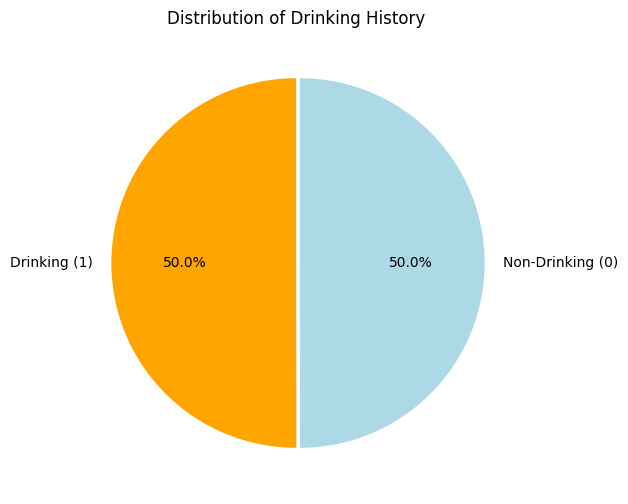

In [18]:
# Create a pie chart

explode=[0, 0.02]
custom_palette = ['orange', 'lightblue'] 

# Create a pie chart with the custom color palette
plt.figure(figsize=(6, 6))
plt.pie(drk_counts, labels=['Drinking (1)', 'Non-Drinking (0)'], autopct='%1.1f%%', colors=custom_palette, startangle=90, explode=explode)
plt.title('Distribution of Drinking History')
plt.show()

In [19]:
# Calculate the mean and standard deviation for drinkers (1)
mean_LDL_drinkers = df[df['drinking_hist'] == 1]['LDL_chole'].mean()
std_LDL_drinkers = df[df['drinking_hist'] == 1]['LDL_chole'].std()

# Calculate the proportion of drinkers (1) in the dataset
proportion_drinkers = len(df[df['drinking_hist'] == 1]) / len(df)

# Calculate the mean and standard deviation for non-drinkers (0)
mean_LDL_nondrinkers = df[df['drinking_hist'] == 0]['LDL_chole'].mean()
std_LDL_nondrinkers = df[df['drinking_hist'] == 0]['LDL_chole'].std()

# Calculate the proportion of non-drinkers (0) in the dataset
proportion_nondrinkers = len(df[df['drinking_hist'] == 0]) / len(df)

# Print the results
print("Drinkers (1):")
print(f"Mean LDL Cholesterol: {mean_LDL_drinkers:.2f}")
print(f"Standard Deviation: {std_LDL_drinkers:.2f}")
print(f"Proportion of Drinkers: {proportion_drinkers:.2%}\n")

print("Non-Drinkers (0):")
print(f"Mean LDL Cholesterol: {mean_LDL_nondrinkers:.2f}")
print(f"Standard Deviation: {std_LDL_nondrinkers:.2f}")
print(f"Proportion of Non-Drinkers: {proportion_nondrinkers:.2%}")

Drinkers (1):
Mean LDL Cholesterol: 111.33
Standard Deviation: 33.55
Proportion of Drinkers: 49.98%

Non-Drinkers (0):
Mean LDL Cholesterol: 114.38
Standard Deviation: 34.59
Proportion of Non-Drinkers: 50.02%


On average, individuals with a drinking history (1) tend to have a slightly lower mean LDL cholesterol level (111.47) compared to those without a drinking history (0) who have a slightly higher mean LDL cholesterol level (114.60), with nearly equal proportions of drinkers and non-drinkers in the dataset.

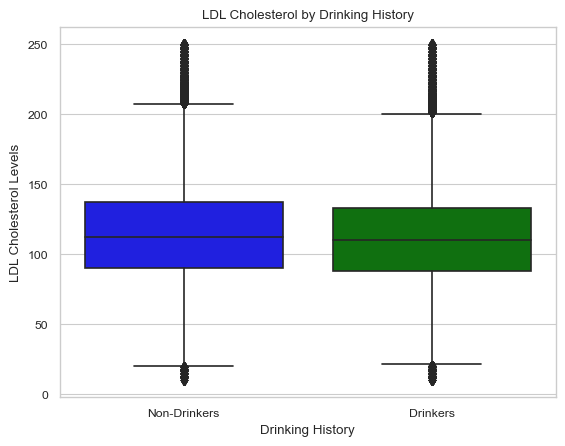

In [26]:
# Calculate the mean LDL cholesterol for drinkers (1) and non-drinkers (0)

sns.boxplot(x='drinking_hist', y='LDL_chole', data=df, palette=['blue', 'green'])
plt.xlabel('Drinking History')
plt.ylabel('LDL Cholesterol Levels')
plt.title('LDL Cholesterol by Drinking History')
plt.xticks([0, 1], ['Non-Drinkers', 'Drinkers'])
plt.show()

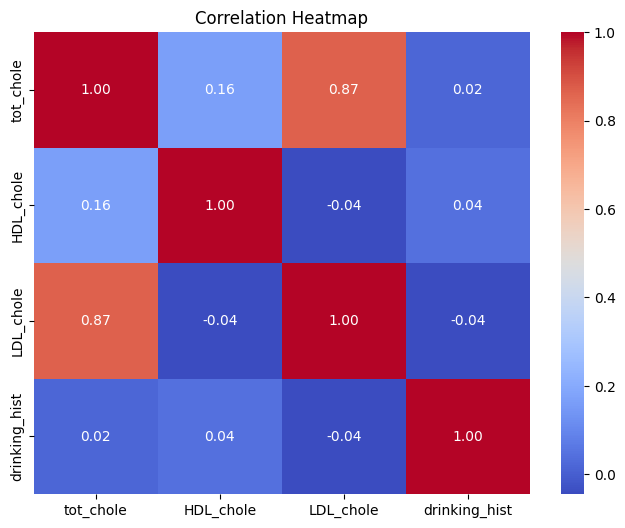

In [21]:
# Calculate the correlation matrix with other cholesterol results

correlation_matrix = df[['tot_chole', 'HDL_chole', 'LDL_chole', 'drinking_hist']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The correlation coefficient for LDL Cholesterol is -0.04. This indicates a very weak linear relationship between LDL cholesterol levels and drinking history.

In [22]:
from scipy.stats import ttest_ind

# Separate the data into two groups: drinkers and non-drinkers
drinkers = df[df['drinking_hist'] == 1]['LDL_chole']
non_drinkers = df[df['drinking_hist'] == 0]['LDL_chole']

# Perform an independent t-test
t_statistic, p_value = ttest_ind(drinkers, non_drinkers, equal_var=False)

# Print the results
print('T-Statistic:', t_statistic)
print('P-Value:', p_value)

T-Statistic: -44.550079625743514
P-Value: 0.0


This independent two-sample t-test, the negative t-statistic (-44.55) suggests that individuals with a drinking history (1) have a lower mean LDL cholesterol levels compared to those without a drinking history (0). The low p-value (0.0) indicates strong evidence to reject the null hypothesis, supporting the hypothesis that drinking has a significant correlation with LDL cholesterol levels.

Drinking is associated with lower LDL cholesterol levels.